# Session 5: Visualization and Machine Learning
MSA 8010: Data Programming

Sources:
- Data: Public crime data provided by the Atlanta Police Department.

    -https://www.atlantapd.org/i-want-to/crime-data-downloads (COBRA-2021)

In [1]:
#Creating a DataFrame of some Titanic passengers
import pandas as pd
df = pd.read_csv("data/COBRA-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16725 entries, 0 to 16724
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   offense_id     16725 non-null  int64  
 1   rpt_date       16725 non-null  object 
 2   occur_date     16716 non-null  object 
 3   occur_day      16716 non-null  object 
 4   occur_day_num  16716 non-null  float64
 5   occur_time     16716 non-null  object 
 6   poss_date      16387 non-null  object 
 7   poss_time      16387 non-null  object 
 8   beat           16725 non-null  int64  
 9   zone           16725 non-null  int64  
 10  location       16725 non-null  object 
 11  ibr_code       16725 non-null  object 
 12  UC2_Literal    16725 non-null  object 
 13  neighborhood   15956 non-null  object 
 14  npu            16519 non-null  object 
 15  lat            16725 non-null  float64
 16  long           16725 non-null  float64
dtypes: float64(3), int64(3), object(11)
memory usage: 

In [2]:
df.head()

,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,beat,zone,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long
0,21140096,5/20/2021,5/19/2021,Wednesday,4.0,15:20,5/19/2021,15:25,103,1,"1720 MARIETTA BLVD NW\nATLANTA, GA 30318\nUNIT...",23F,LARCENY-FROM VEHICLE,Hills Park,D,33.801693,-84.436453
1,21282015,8/6/2021,8/6/2021,Friday,6.0,22:23,8/6/2021,22:24,508,5,"300 PEACHTREE ST NE\nATLANTA, GA 30308\nUNITED...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.762549,-84.387874
2,21320347,2/1/2021,1/31/2021,Sunday,1.0,00:00,2/1/2021,06:53,509,5,"229 COURTLAND ST NE\nATLANTA, GA 30303\nUNITED...",23F,LARCENY-FROM VEHICLE,Downtown,M,33.760759,-84.383773
3,21791668,6/28/2021,6/27/2021,Sunday,1.0,21:17,6/28/2021,20:00,102,1,"870 MAYSON TURNER RD NW\nATLANTA, GA 30314\nUN...",23H,LARCENY-NON VEHICLE,Vine City,L,33.755768,-84.416631
4,61583880,2/11/2021,2/11/2021,Thursday,5.0,19:15,2/11/2021,20:29,401,4,"850 OAK ST SW\nATLANTA, GA 30310\nUNITED STATES",23F,LARCENY-FROM VEHICLE,West End,T,33.740594,-84.415800


In [3]:
def fixdatetime(fld):
    def _fix(s):
        date_col = '%s_date' % fld # "rpt_date"
        time_col = '%s_time' % fld # "rpt_time"
        if time_col in s.index:
            return str(s[date_col])+' '+str(s[time_col])
        else:
            return str(s[date_col])+' 00:00:00'
    return _fix

In [4]:
df['rpt_date'] = pd.to_datetime(df['rpt_date'])
df['occur_date'] = pd.to_datetime(df['occur_date'])
df['poss_date'] = pd.to_datetime(df['poss_date'])

In [5]:
df[["rpt_date","occur_date","poss_date"]].info()
#[ns] shows the precison is in nanoseconds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16725 entries, 0 to 16724
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rpt_date    16725 non-null  datetime64[ns]
 1   occur_date  16716 non-null  datetime64[ns]
 2   poss_date   16387 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 392.1 KB


In [6]:
print ("Min:",df.occur_date.min(), "Max:",df.occur_date.max())

df = df[df['occur_date'].dt.year >= 2021]
print('\nAftr removing all dates before 2021:')
print ("Min:",df.occur_date.min(), "Max:", df.occur_date.max())

Min: 1922-02-17 00:00:00 Max: 2021-09-16 00:00:00

Aftr removing all dates before 2021:
Min: 2021-01-01 00:00:00 Max: 2021-09-16 00:00:00


In [7]:
df[["occur_date", "UC2_Literal", "offense_id"]].head()

,occur_date,UC2_Literal,offense_id
0,2021-05-19,LARCENY-FROM VEHICLE,21140096
1,2021-08-06,LARCENY-FROM VEHICLE,21282015
2,2021-01-31,LARCENY-FROM VEHICLE,21320347
3,2021-06-27,LARCENY-NON VEHICLE,21791668
4,2021-02-11,LARCENY-FROM VEHICLE,61583880


In [8]:
# resample is like "groupby" for time
df.resample('M', closed='right', on='occur_date').offense_id.count()

occur_date
2021-01-31    2394
2021-02-28    1785
2021-03-31    1839
2021-04-30    1630
2021-05-31    1756
2021-06-30    1690
2021-07-31    2198
2021-08-31    2171
2021-09-30    1058
Freq: M, Name: offense_id, dtype: int64

In [9]:
df_ct = df.pivot_table(index="occur_date", columns="UC2_Literal", values="offense_id")
#pd.options.display.float_format = '{:.0f}'.format
df_ct.round(2).head()

UC2_Literal,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY
occur_date,,,,,,,
2021-01-01,2.100110e+08,2.100557e+08,2.106196e+08,NaN,2.100170e+08,2.100425e+08,2.100110e+08
2021-01-02,2.100239e+08,2.100238e+08,2.100210e+08,NaN,2.100250e+08,2.100326e+08,2.100213e+08
2021-01-03,2.100304e+08,2.100333e+08,2.100410e+08,NaN,2.100334e+08,2.100342e+08,2.100315e+08
2021-01-04,2.100432e+08,2.100412e+08,2.100473e+08,210041272.0,2.100463e+08,2.094246e+08,2.100403e+08
2021-01-05,2.100512e+08,2.100581e+08,2.100517e+08,NaN,2.100582e+08,2.100662e+08,NaN


In [10]:
df_ct = df_ct.resample("1M", closed="right").count()
df_ct.head()

UC2_Literal,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY
occur_date,,,,,,,
2021-01-31,31,31,31,7,31,31,27
2021-02-28,27,28,28,8,28,28,27
2021-03-31,31,31,31,8,31,31,24
2021-04-30,30,30,30,9,30,30,29
2021-05-31,31,31,31,12,31,31,29


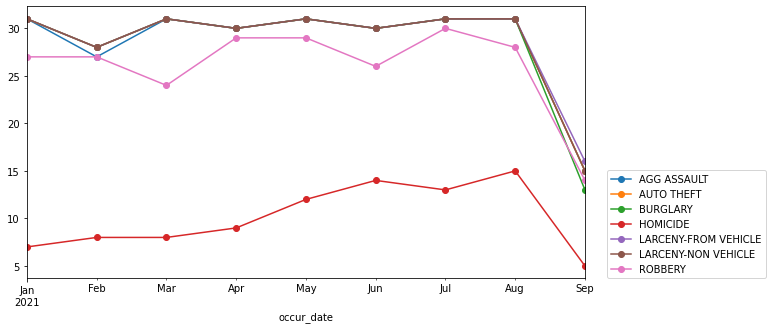

In [11]:
import matplotlib.pyplot as plt
df_ct.plot(figsize=(10,5), style='-o')
plt.legend(loc=(1.04,0))


#### Box Plot

<img src="boxplot.png" width="800" align="center" />



- **median (Q2/50th Percentile):** the middle value of the dataset.
- **first quartile (Q1/25th Percentile):** the middle number between the smallest number (not the “minimum”) and the median of the dataset.
- **third quartile (Q3/75th Percentile):** the middle value between the median and the highest value (not the “maximum”) of the dataset.
- **interquartile range (IQR):** 25th to the 75th percentile.

Text(0, 0.5, 'Total Crimes')

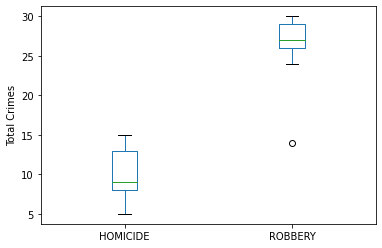

In [12]:
ax = df_ct[["HOMICIDE","ROBBERY"]].plot.box()
plt.ylabel("Total Crimes")

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Atlanta_Police_Zones_-_Feb_2013.jpg/588px-Atlanta_Police_Zones_-_Feb_2013.jpg" />

In [13]:
import numpy as np
df['Zone'] = df['beat']//100
df['Year'] = df["occur_date"].apply(lambda x: x.year)
df_cp = df.pivot_table(index="Zone", 
                       columns="UC2_Literal", 
                       values="offense_id", 
                       aggfunc=lambda x: np.count_nonzero(~np.isnan(x)))

In [14]:
df_cp

UC2_Literal,AGG ASSAULT,AUTO THEFT,BURGLARY,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY
Zone,,,,,,,
1,378.0,294.0,177.0,27.0,525.0,428.0,103.0
2,176.0,482.0,148.0,9.0,1432.0,805.0,79.0
3,420.0,347.0,217.0,21.0,446.0,431.0,102.0
4,384.0,324.0,192.0,22.0,573.0,523.0,102.0
5,263.0,629.0,133.0,11.0,2263.0,751.0,127.0
6,190.0,326.0,173.0,19.0,1562.0,616.0,97.0
7,5.0,27.0,3.0,NaN,47.0,112.0,NaN


### Machine Learning


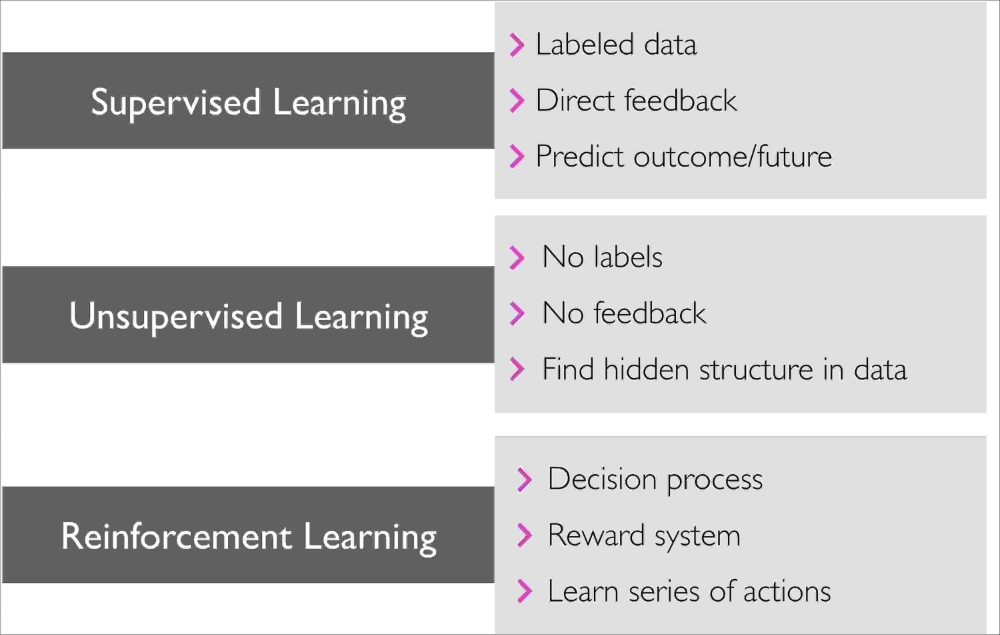

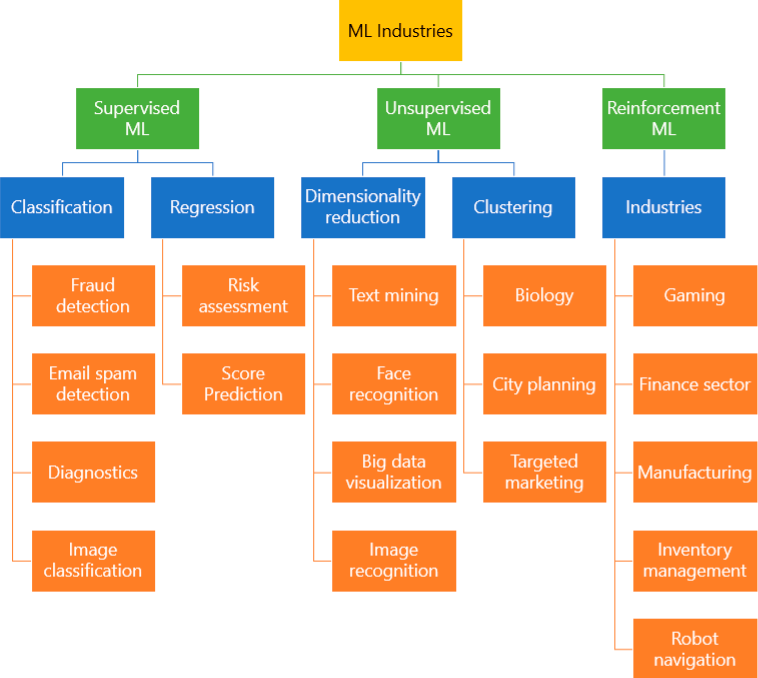

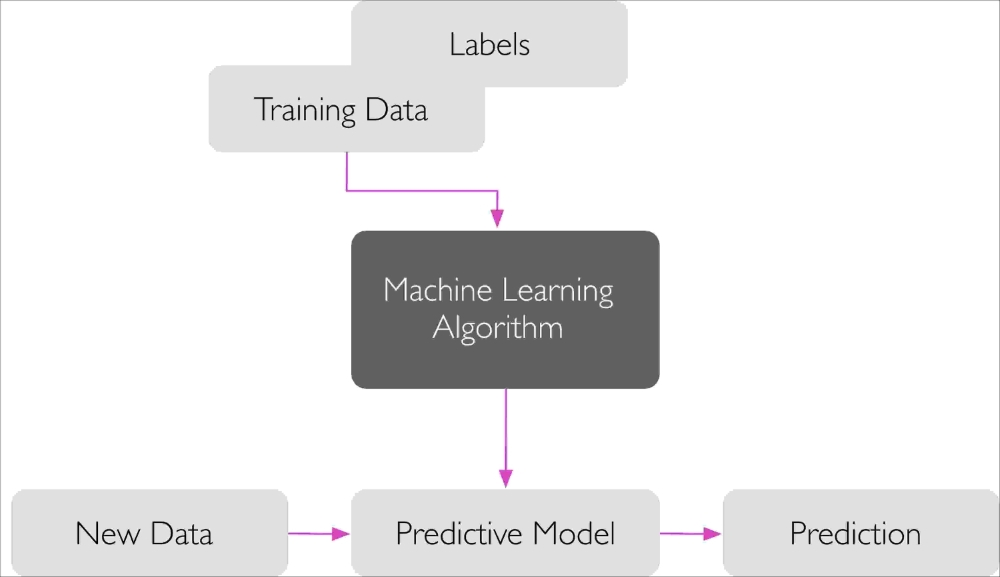

#### Regression: Predicting continuous labels

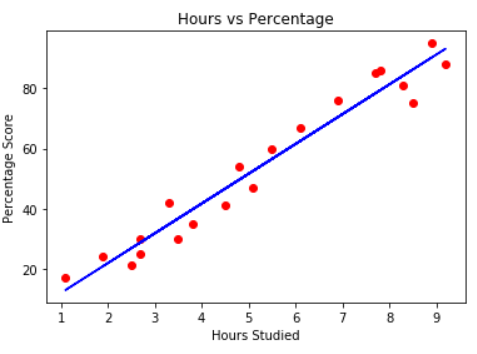


<img src="mse.png" width="400" />

<img src="rmse.png" width="500" />

#### Linear Regression: Home Price
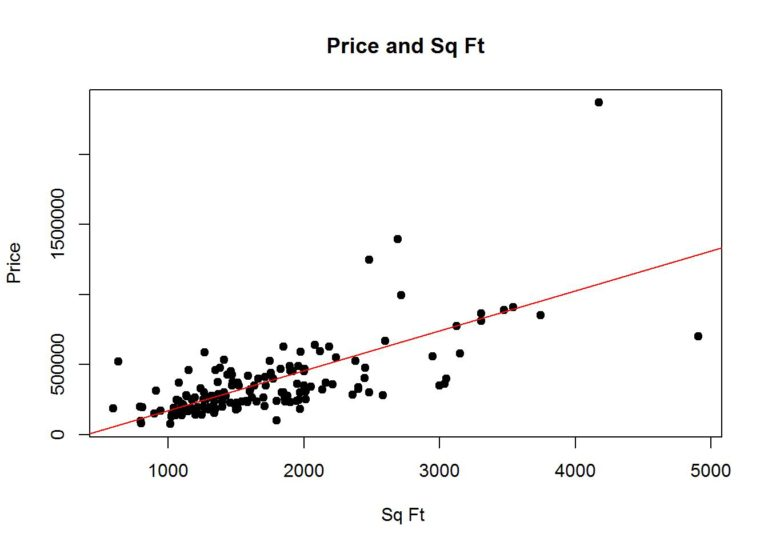

`conda install -c conda-forge scikit-learn`

`conda install -c anaconda seaborn`

In [15]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [29]:
def Explore(df):
        print('DataFrame Shape : \n')
        display(df.shape)
        print('DataFrame examples : \n')
        display(df.head())
        print("information about Dataset")
        display(df.info())
        print('DataFrame Description : \n')
        display(df.describe().T)

In [17]:
house = datasets.load_boston()
print(type(house))
x = pd.DataFrame(house.data, columns=house.feature_names)
print(type(x))

<class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
Explore(x)

DataFrame Shape : 



(506, 13)

DataFrame examples : 



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


information about Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


None

DataFrame Description : 



,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [19]:
print("The data shape of house is {}".format(house.data.shape))
print("The number of feature in this data set is {}".format(
    house.data.shape[1]))

The data shape of house is (506, 13)
The number of feature in this data set is 13


In [20]:
train_x, test_x, train_y, test_y = train_test_split(house.data,
                                                    house.target,
                                                    test_size=0.2,
                                                    random_state=42)

In [21]:
print(len(train_x))
print(train_x[0:1])

404
[[1.50234e+01 0.00000e+00 1.81000e+01 0.00000e+00 6.14000e-01 5.30400e+00
  9.73000e+01 2.10070e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.49480e+02
  2.49100e+01]]


In [22]:
print(len(test_x))
print(test_x[0:1])

102
[[9.1780e-02 0.0000e+00 4.0500e+00 0.0000e+00 5.1000e-01 6.4160e+00
  8.4100e+01 2.6463e+00 5.0000e+00 2.9600e+02 1.6600e+01 3.9550e+02
  9.0400e+00]]


In [23]:
print(len(train_y))
print(train_y[0:1])

404
[12.]


In [24]:
print(len(test_y))
print(test_y[0:1])

102
[23.6]


In [30]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [26]:
pred_y = lr.predict(test_x)

In [27]:
mse = metrics.mean_squared_error(test_y, pred_y)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 24.29111947497339


In [28]:
print("The first five prediction {}".format(pred_y[:5]))
print("The real first five labels {}".format(test_y[:5]))

The first five prediction [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]
The real first five labels [23.6 32.4 13.6 22.8 16.1]


In [33]:
from sklearn.metrics import r2_score
r2_score(test_y, pred_y)


0.6687594935356338

### Exercise

With WW2 weather data (located at: `data/weather.csv`):
- Explore data with visualizations
- Create a linear regression model
- Show Mean Squerd Error
